In [1]:
import numpy as np
import pandas as pd
from scipy.io import arff
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,roc_curve,accuracy_score

In [4]:
data = pd.read_csv('diabetes.csv')
data


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# meta data information
# Number of Instances: 768Number of Attributes: 8 plus class
# For Each Attribute: (all numeric-valued)
# Number of times pregnant
# Plasma glucose concentration a 2 hours in an oral glucose tolerance test
# Diastolic blood pressure (mm Hg)
# Triceps skin fold thickness (mm)
# 2-Hour serum insulin (mu U/ml)
# Body mass index (weight in kg/(height in m)^2)
# Diabetes pedigree function
# Age (years)
# Class variable (0 or 1)

####  Compute mean & standard deviation , tabulate and visualize the age of the patients.

In [5]:
print(data.mean())

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64


In [6]:
print(data.std())

Pregnancies                   3.369578
Glucose                      31.972618
BloodPressure                19.355807
SkinThickness                15.952218
Insulin                     115.244002
BMI                           7.884160
DiabetesPedigreeFunction      0.331329
Age                          11.760232
Outcome                       0.476951
dtype: float64


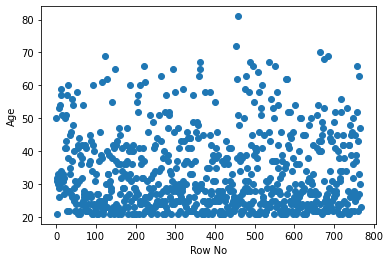

In [8]:
#Q2
plt.scatter(data.index,data['Age'])
plt.xlabel("Row No")
plt.ylabel("Age")
plt.show()

In [9]:
#sns.pairplot(data, hue="Outcome", corner=True, kind='reg')

/Users/arhamshaikh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


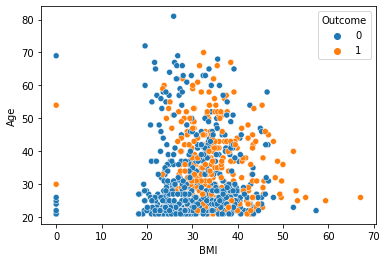

In [10]:
sns.scatterplot(data['BMI'],data['Age'],hue=data['Outcome'])
plt.show()

#### Analyze and tabulate the relationship of age, BMI of patients with respect to the class

In [11]:
data['Age'].describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

In [12]:
data['BMI'].describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

In [13]:
data['Age'].corr(data['BMI'])

0.03624187009229411

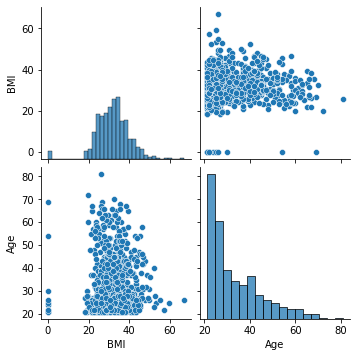

In [14]:
sns.pairplot(data, vars=['BMI','Age'])

#### Tabulate the class label and comment on whether the classes are balanced.

/Users/arhamshaikh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


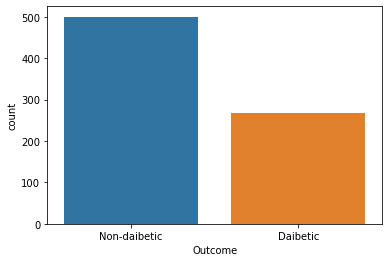

In [15]:
g = sns.countplot(data['Outcome'])
g.set_xticklabels(['Non-daibetic','Daibetic'])
plt.show()

As we have more data for Non-diabetic than diabetic, therefore not balanced

#### Use the data set to build a logistic regression model (using sklearn) and predict the class label. Divide the dataset into training and test set (70,30) using train_test_split method in sklearn

In [16]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1:]
y = np.ravel(y)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [18]:
regressor = LogisticRegression(max_iter=500)

In [19]:
regressor.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [20]:
y_pred = regressor.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

#### Use the test data set and evaluate the performance using a confusion matrix. Visualize the confusion matrix using a heat map.

In [21]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.80      0.79      0.80       151\n           1       0.62      0.62      0.62        80\n\n    accuracy                           0.74       231\n   macro avg       0.71      0.71      0.71       231\nweighted avg       0.74      0.74      0.74       231\n'

In [22]:
confusion_matrix = confusion_matrix(y_test,y_pred)

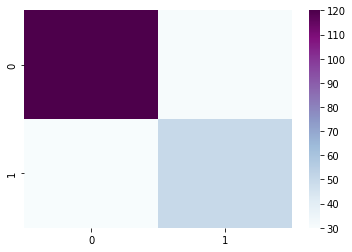

In [23]:
ax = sns.heatmap(confusion_matrix, cmap="BuPu")

#### Compute accuracy rate, true positive and true negative rate and comment on the performance.

In [24]:
tn, fp, fn, tp = confusion_matrix.ravel()
specificity = tn / (tn+fp)
precision = tp/(tp+fp)
print("True negative rate: "+ str(specificity))
print("True positive rate: "+ str(precision))

True negative rate: 0.7947019867549668
True positive rate: 0.6172839506172839


#### Visualize the ROC curve, and comment on the performance of the classifier.

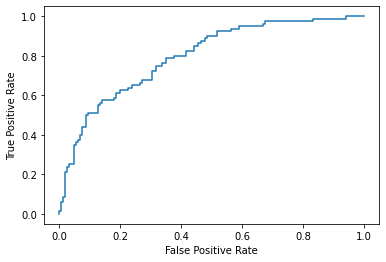

In [25]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = regressor.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()